In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib notebook
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
from mpl_toolkits import mplot3d
import pandas as pd

#import numpy array
#import scipy.integrate as integrate

#%pylab

In [2]:
#constants

h_bar = 1.9e5 #in KJ.A.mol-1.c-2            
m_3He = 2.59e11# in kj.mol-1.c^-2 For 3He
m_4He = 3.39e11# in kj.mol-1.c^-2 For 4He

In [3]:
#IF you want to reduce the grid close to zero, please  just change the starting value of h_positive and h_negative: In this case, it iis 0.03

# Define grid for plotting
a_r, b_r = -3.5, 3.5 #Starting and ending grid point for r direction
a_z, b_z = 1.5, 4.15 #Starting and ending grid point for z direction for all
#a_z=-3.5 #For HARMONIC APPROXIMATION
Nz= Nr = N = 15 #120 works
#Nz= Nr = N = 99  #Number of grid points         YOU CAN USE MORE THAN 100 NUMBERS OF POINTS ON EACH SIDE                                                                                                                                                                                                                    

# Generate the grid points
z= np.linspace(a_z,b_z,Nz+1, dtype=float)
r= np.linspace(a_r,b_r,Nr+1, dtype=float)

#set the uniform grid spacing 
dr=r[1]-r[0] # Step size along the r axis
dz=z[1]-z[0]  # Step size along the z axis
#dr=2*np.pi*ddr# Step size along the r axis
#dz=z[1]-z[0]  # Step size along the z axis

##################################### Evaluation of the function on a grid ##############################
Z,R = np.meshgrid(z,r)
#########################################################################################################

In [4]:
####################### Potential energy: ANHARMONIC APPROXIMATION #######################
################ Morse Potential (CCSD(T)/aug-cc-pVTZ) in CFOUR ###############################################################################
De=8.17#in Kj/mol   # Dissociation energy
alpha=2.04# in 1/(Angstrom)  # Variable related to the curvature of the curve  
ze=2.01 # in (Angstrom)       # Minimum distance 


z2=(z-ze)
def get2_potential(z2):
    return De*(np.exp(-2*alpha*z2)-2*np.exp(-alpha*z2))


#####################  Infinite cylindrical well. #####################
# Define the range of r0 values
r0_values = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]

# Define the potential functions
def V1(R, r0):
    return np.where(np.abs(R) < r0, 0, 1000000)


In [11]:
#####################  Infinite cylindrical well. #####################
#r0=4 or 3
r0=4.5
rr0=1.0
rrr0=0.9
def V(R):
    return np.where((abs(R)<=r0),0,1000)

def VV(R):
    return np.where((abs(R)<=rr0),0,1000)

def VV1(R):
    return np.where((abs(R)<=rrr0),0,1000)

############################################ Morse potential + Infinite Cylindrical well  ###################################################################
V3=get2_potential(z2)+V(R)
VV3=get2_potential(z2)+VV(R)
VV4=get2_potential(z2)+VV1(R)


VVV = V3@(np.identity(Nz+1))
VVV1 = VV3@(np.identity(Nz+1))
VVV2 = VV4@(np.identity(Nz+1))
#V3 =  np.diag(get2_potential(z2).reshape((Nz+1)**2))
#V4 =  np.diag(V(R).reshape((Nz+1)**2))  

V4 = np.diag(V3.reshape((Nz+1)**2))


#Confinement potential
V5 = np.diag(VV3.reshape((Nz+1)**2))
V6 = np.diag(VV4.reshape((Nz+1)**2))


<IPython.core.display.Javascript object>


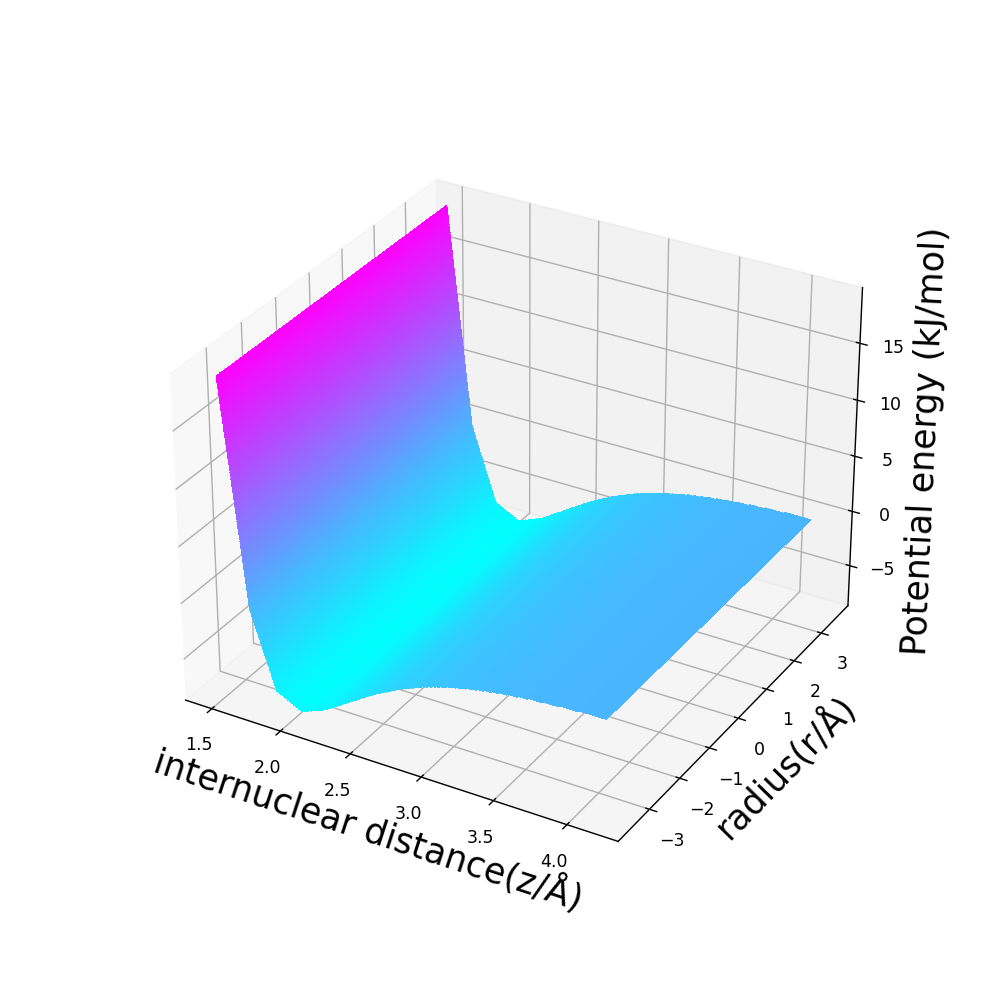

In [12]:
from mpl_toolkits import mplot3d 

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
plt.contourf(Z,R,VVV, 300, cmap=cm.cool)
ax.set_xlabel('internuclear distance(z/Å)', fontsize=20)
ax.set_ylabel('radius(r/Å)',fontsize=20)
ax.set_zlabel('Potential energy (kJ/mol)',fontsize=20) 
plt.show()


<IPython.core.display.Javascript object>


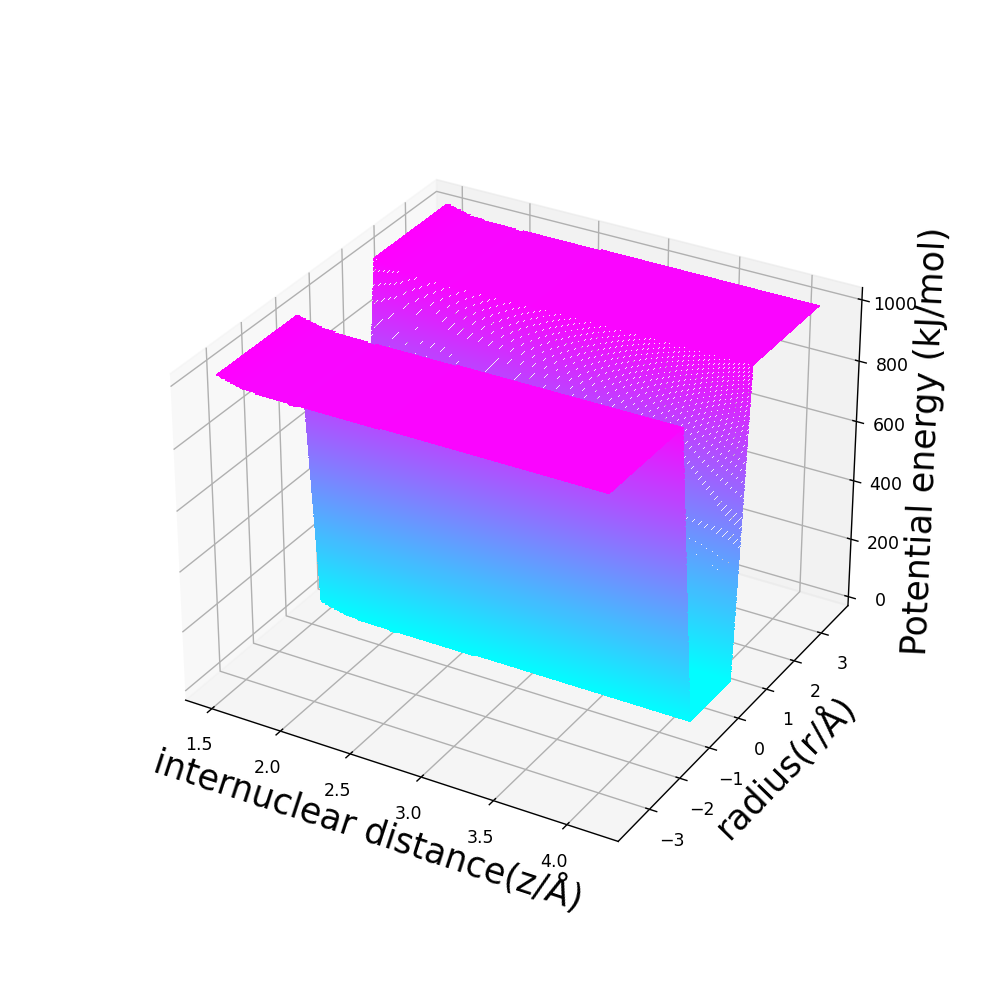

In [13]:
from mpl_toolkits import mplot3d 

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
plt.contourf(Z,R,VVV1, 300, cmap=cm.cool)
ax.set_xlabel('internuclear distance(z/Å)', fontsize=20)
ax.set_ylabel('radius(r/Å)',fontsize=20)
ax.set_zlabel('Potential energy (kJ/mol)',fontsize=20) 
plt.show()


## Comment: ro > R  then we have a Morse potential (R is a raduis or diameter/2 of the cylinder )  If ro < R then, we have another shape (I don't know exactly) 

In [14]:
#Solution Matrix
A = np.zeros((Nr+1,Nr+1))
for i in range(1,Nr):
    for j in range(1,Nr):
        if i==j:
# Main central diagonal.  
            A[i,j]=-2
# Lower main diagonal. 
        elif i==j+1:
            A[i,j]=(1-(1/(2*(j+1))))
# Upper main diagonal.
        elif i+1==j:
            A[i,j]=(1+(1/(2*(j-1))))
            

# Apply boundary conditions to the coefficient matrix 
#Boundary conditions at r=0
A[0,0]=-4
A[0,1]=4
A[1,0] = (1-(1/(2*(0+1)))) #left

# Set the boundary conditions
#A[-1:,-1:] =0.5 #rigth

A[N-1:,N:] = (1+(1/(2*((N)-1)))) #Good

#A[N:,N-1:] = 0 #bottom
#A[-1:,-1:] = 0 #rigth

A[N:,N-1:] = (1-(1/(2*(N)))) #bottom #Good
A[-1:,-1:] =-2 #rigth Good
#A[:,4] =0.5

############################################## Division of the Matrix by the square step size (dr)#####################
AA=A/(dr**2)
#AA

B=np.zeros((Nz+1,Nz+1))
for q in range(Nz+1):
    for n in range(Nz+1):
        if q==n:
            B[q,n]=-2
        elif q==n+1:
            B[q,n]=1
        elif q+1==n:
            B[q,n]=1
            
############################################## Division of the Matrix by the square step size (dz)#####################
BB=B/(dz**2)
#BB
IB=np.identity(N+1)
IA=np.identity(N+1)
####################################################################################################
s1 = np.kron(IB,AA)
s2 = np.kron(BB,IA)
s =  s1 + s2


Hamii=(T1+V4)
eigenvaluess, eigenvectorss = np.linalg.eigh(Hamii)
E=eigenvaluess
W=eigenvectorss.T  #we use T as a transpose here which is a kind of normalization in analytical resolution

In [15]:
def create_kinetic_energy_operator(mass):
    """
    Create the kinetic energy operator T1 based on the mass and grid size.
    """
    T1 = -((h_bar**2) / (2 * mass)) * s
    return T1


def create_potential_operator(z, ze, De, alpha, r0, potential_type ='V1'):
    """
    Create the potential energy operator based on the r0, beta values, and potential type.
     Parameters:
    R (numpy array): The array of radial distances.
    r0 (float): The cutoff radius for the potential.
    beta (float, optional): The beta parameter for the harmonic approximation (only used if potential_type is 'V2').
    potential_type (str): The type of potential to calculate ('V1' or 'V2').
    """
    if potential_type == 'V1':
        V_radial = np.where(np.abs(R) < r0, 0, 1000000)
    else:
        raise ValueError("Invalid potential_type. Use 'V1'")

    # Calculate the additional potential
    def get2_potential(z2):
        return De * (np.exp(-2 * alpha * z2) - 2 * np.exp(-alpha * z2))

    # Compute the total potential
    V_additional = get2_potential(z2)
    V_total = V_additional + V_radial # USE V_radial2 to include beta
    V_matrix = np.diag(V_total.reshape((Nz+1)**2))
    return V_matrix

def create_hamiltonian(mass, r0, potential_type='V1'):
    """
    Create the Hamiltonian matrix for given mass, potential type, r0, and beta values.
    """
    T1 = create_kinetic_energy_operator(mass)
    V = create_potential_operator(z, ze, De, alpha, r0, potential_type='V1')
    Hamii = T1 + V
    return Hamii

# Initialize lists to store results
results = []

# Compute Hamiltonians and eigenvalues for different cases
for mass in [m_3He, m_4He]:
    for r0 in r0_values:
        for potential_type in ['V1']: # print only V1
            Hamii = create_hamiltonian(mass, r0, potential_type='V1')
            
            # Compute eigenvalues and eigenvectors
            eigenvalues, eigenvectors = np.linalg.eigh(Hamii)
            
            # Store results
            results.append({
                'Mass': mass,
                'r0': r0,
                'Potential Type': potential_type,
                'Lowest Eigenvalue': eigenvalues[0]+De
            })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Print results in a table
print(df_results.to_string(index=False))

        Mass   r0 Potential Type  Lowest Eigenvalue
2.590000e+11 0.05             V1       1.000001e+06
2.590000e+11 0.06             V1       1.000001e+06
2.590000e+11 0.07             V1       1.000001e+06
2.590000e+11 0.08             V1       1.000001e+06
2.590000e+11 0.09             V1       1.000001e+06
2.590000e+11 0.10             V1       1.000001e+06
2.590000e+11 0.20             V1       1.000001e+06
2.590000e+11 0.30             V1       2.750205e+00
2.590000e+11 0.40             V1       2.750205e+00
2.590000e+11 0.50             V1       2.750205e+00
2.590000e+11 0.60             V1       2.750205e+00
2.590000e+11 0.70             V1       2.750205e+00
2.590000e+11 0.80             V1       1.370204e+00
2.590000e+11 0.90             V1       1.370204e+00
2.590000e+11 1.00             V1       1.370204e+00
2.590000e+11 1.10             V1       1.370204e+00
2.590000e+11 1.20             V1       9.595669e-01
2.590000e+11 1.30             V1       9.595669e-01
2.590000e+11